In [1]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl
import warnings
warnings.filterwarnings('ignore')

print("✅ Библиотеки загружены успешно!")

✅ Библиотеки загружены успешно!


In [2]:
#2. Определение нечетких переменных

In [3]:
# Создание универсумов (диапазонов значений)
# Температура листа в градусах Цельсия (для большинства растений)
temp_leaf = np.arange(5, 41, 1)  # 5°C - 40°C

# Скорость фотосинтеза в условных единицах (0-100%)
photosynthesis_rate = np.arange(0, 101, 1)

# Функции принадлежности для ТЕМПЕРАТУРЫ ЛИСТА
temp_low = fuzz.trimf(temp_leaf, [5, 5, 20])      # Низкая температура
temp_optimal = fuzz.trimf(temp_leaf, [15, 25, 35]) # Оптимальная температура  
temp_high = fuzz.trimf(temp_leaf, [30, 40, 40])    # Высокая температура

# Функции принадлежности для СКОРОСТИ ФОТОСИНТЕЗА
photo_low = fuzz.trimf(photosynthesis_rate, [0, 0, 40])     # Низкая скорость
photo_medium = fuzz.trimf(photosynthesis_rate, [20, 50, 80]) # Средняя скорость
photo_high = fuzz.trimf(photosynthesis_rate, [60, 100, 100]) # Высокая скорость

In [4]:
#3. Визуализация функций принадлежности

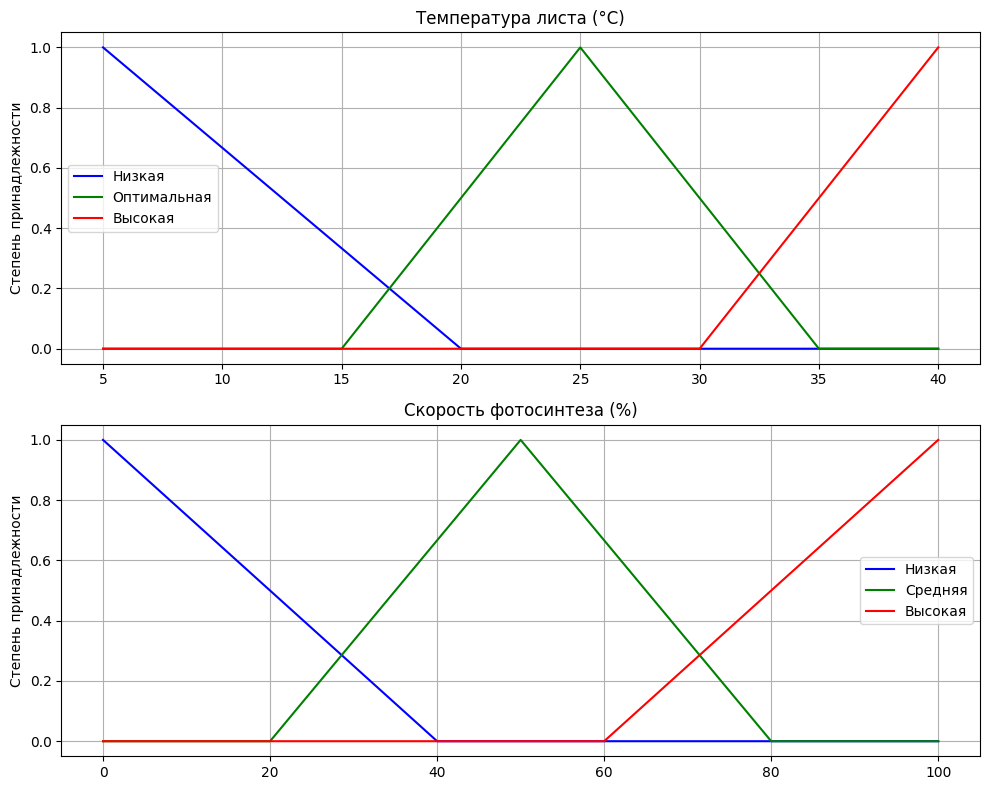

In [5]:
# Визуализация функций принадлежности
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Температура листа
ax1.plot(temp_leaf, temp_low, 'b', linewidth=1.5, label='Низкая')
ax1.plot(temp_leaf, temp_optimal, 'g', linewidth=1.5, label='Оптимальная')
ax1.plot(temp_leaf, temp_high, 'r', linewidth=1.5, label='Высокая')
ax1.set_title('Температура листа (°C)')
ax1.set_ylabel('Степень принадлежности')
ax1.legend()
ax1.grid(True)

# Скорость фотосинтеза
ax2.plot(photosynthesis_rate, photo_low, 'b', linewidth=1.5, label='Низкая')
ax2.plot(photosynthesis_rate, photo_medium, 'g', linewidth=1.5, label='Средняя')
ax2.plot(photosynthesis_rate, photo_high, 'r', linewidth=1.5, label='Высокая')
ax2.set_title('Скорость фотосинтеза (%)')
ax2.set_ylabel('Степень принадлежности')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

In [6]:
#4. Создание системы нечеткого вывода

In [7]:
# Создание антецедентов и консеквентов
temperature = ctrl.Antecedent(temp_leaf, 'temperature')
photosynthesis = ctrl.Consequent(photosynthesis_rate, 'photosynthesis')

# Назначение функций принадлежности
temperature['low'] = fuzz.trimf(temperature.universe, [5, 5, 20])
temperature['optimal'] = fuzz.trimf(temperature.universe, [15, 25, 35])
temperature['high'] = fuzz.trimf(temperature.universe, [30, 40, 40])

photosynthesis['low'] = fuzz.trimf(photosynthesis.universe, [0, 0, 40])
photosynthesis['medium'] = fuzz.trimf(photosynthesis.universe, [20, 50, 80])
photosynthesis['high'] = fuzz.trimf(photosynthesis.universe, [60, 100, 100])

In [8]:
#5. База нечетких правил

In [9]:
# Создание базы правил на основе биологических знаний
rule1 = ctrl.Rule(temperature['low'], photosynthesis['low'])
rule2 = ctrl.Rule(temperature['optimal'], photosynthesis['high'])
rule3 = ctrl.Rule(temperature['high'], photosynthesis['low'])

# Дополнительные правила для более точной модели
rule4 = ctrl.Rule(temperature['low'] | temperature['high'], photosynthesis['low'])
rule5 = ctrl.Rule(temperature['optimal'] & ~temperature['high'], photosynthesis['high'])

# Сбор всех правил
photosynthesis_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
photosynthesis_system = ctrl.ControlSystemSimulation(photosynthesis_ctrl)

print("✅ Система нечеткого вывода создана успешно!")
print("✅ База содержит 5 правил:")
print("   1. ЕСЛИ температура низкая ТО фотосинтез низкий")
print("   2. ЕСЛИ температура оптимальная ТО фотосинтез высокий")
print("   3. ЕСЛИ температура высокая ТО фотосинтез низкий")
print("   4. ЕСЛИ температура низкая ИЛИ высокая ТО фотосинтез низкий")
print("   5. ЕСЛИ температура оптимальная И НЕ высокая ТО фотосинтез высокий")

✅ Система нечеткого вывода создана успешно!
✅ База содержит 5 правил:
   1. ЕСЛИ температура низкая ТО фотосинтез низкий
   2. ЕСЛИ температура оптимальная ТО фотосинтез высокий
   3. ЕСЛИ температура высокая ТО фотосинтез низкий
   4. ЕСЛИ температура низкая ИЛИ высокая ТО фотосинтез низкий
   5. ЕСЛИ температура оптимальная И НЕ высокая ТО фотосинтез высокий


In [10]:
#6. Тестирование системы

=== ТЕСТИРОВАНИЕ СИСТЕМЫ ===
Температура: 10°C → Фотосинтез:  14.4% (НИЗКАЯ)
Температура: 18°C → Фотосинтез:  61.8% (СРЕДНЯЯ)
Температура: 25°C → Фотосинтез:  86.7% (ВЫСОКАЯ)
Температура: 32°C → Фотосинтез:  56.0% (СРЕДНЯЯ)
Температура: 38°C → Фотосинтез:  13.8% (НИЗКАЯ)


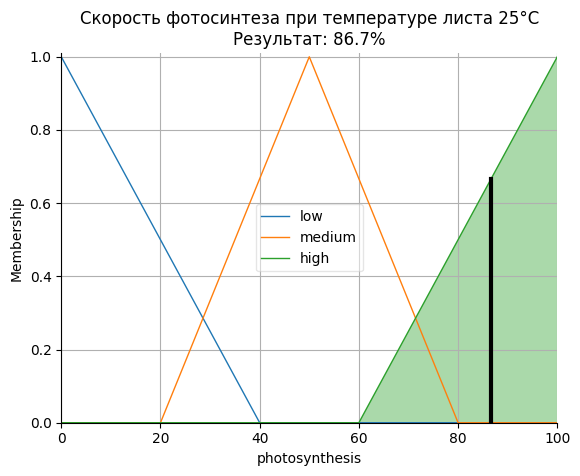

In [11]:
# Тестовые примеры
test_temperatures = [10, 18, 25, 32, 38]  # Разные температуры листа
results = []

print("=== ТЕСТИРОВАНИЕ СИСТЕМЫ ===")
for temp in test_temperatures:
    photosynthesis_system.input['temperature'] = temp
    photosynthesis_system.compute()
    rate = photosynthesis_system.output['photosynthesis']
    results.append((temp, rate))
    
    # Определение категории
    if rate < 30:
        category = "НИЗКАЯ"
    elif rate < 70:
        category = "СРЕДНЯЯ"
    else:
        category = "ВЫСОКАЯ"
    
    print(f"Температура: {temp:2}°C → Фотосинтез: {rate:5.1f}% ({category})")

# Визуализация для примера 25°C
temp_test = 25
photosynthesis_system.input['temperature'] = temp_test
photosynthesis_system.compute()
result = photosynthesis_system.output['photosynthesis']

photosynthesis.view(sim=photosynthesis_system)
plt.title(f'Скорость фотосинтеза при температуре листа {temp_test}°C\nРезультат: {result:.1f}%')
plt.grid(True)
plt.show()

In [12]:
#7. Детальный расчет для конкретного примера

In [13]:
print("\n=== ДЕТАЛЬНЫЙ РАСЧЕТ ДЛЯ 25°C ===")

# Фаззификация
temp_value = 25
qual_level_low = fuzz.interp_membership(temp_leaf, temp_low, temp_value)
qual_level_optimal = fuzz.interp_membership(temp_leaf, temp_optimal, temp_value)
qual_level_high = fuzz.interp_membership(temp_leaf, temp_high, temp_value)

print(f"Температура листа: {temp_value}°C")
print(f"Степень принадлежности:")
print(f"  • Низкая: {qual_level_low:.3f}")
print(f"  • Оптимальная: {qual_level_optimal:.3f}")
print(f"  • Высокая: {qual_level_high:.3f}")

# Применение правил (метод минимума)
active_rule1 = qual_level_low
photo_activation_low = np.fmin(active_rule1, photo_low)

active_rule2 = qual_level_optimal  
photo_activation_high = np.fmin(active_rule2, photo_high)

active_rule3 = qual_level_high
photo_activation_low2 = np.fmin(active_rule3, photo_low)

# Объединение активаций для низкой скорости
photo_activation_low_combined = np.fmax(photo_activation_low, photo_activation_low2)

# Агрегирование всех правил
aggregated = np.fmax(photo_activation_low_combined, photo_activation_high)

# Дефазификация (метод центра тяжести)
photo_rate = fuzz.defuzz(photosynthesis_rate, aggregated, 'centroid')
photo_activation = fuzz.interp_membership(photosynthesis_rate, aggregated, photo_rate)

print(f"\nРезультат дефазификации: {photo_rate:.1f}%")


=== ДЕТАЛЬНЫЙ РАСЧЕТ ДЛЯ 25°C ===
Температура листа: 25°C
Степень принадлежности:
  • Низкая: 0.000
  • Оптимальная: 1.000
  • Высокая: 0.000

Результат дефазификации: 86.7%


In [14]:
#8. Визуализация процесса нечеткого вывода

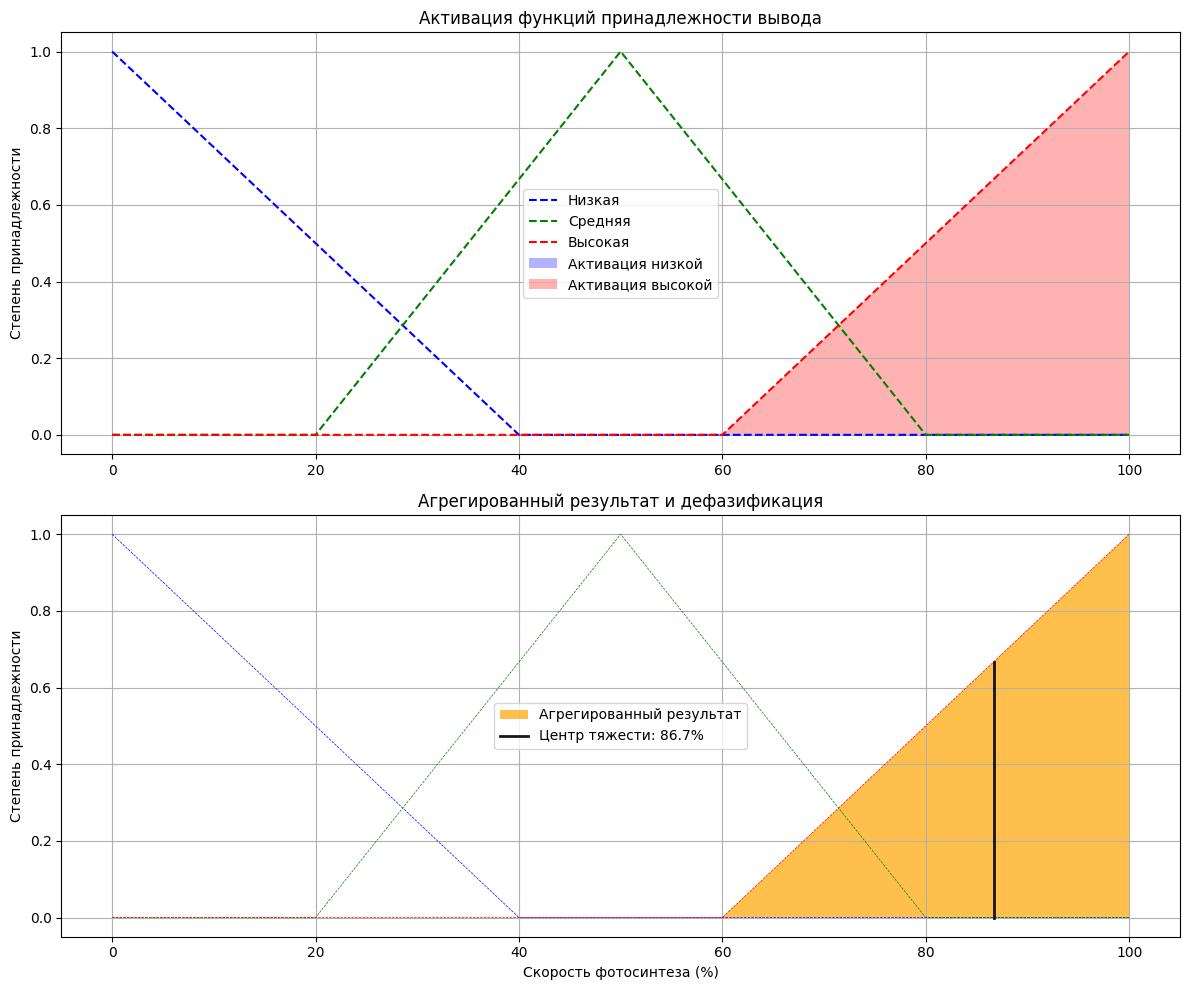

In [15]:
# Визуализация активации правил и агрегации
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Активация правил
ax1.plot(photosynthesis_rate, photo_low, 'b', linewidth=1.5, linestyle='--', label='Низкая')
ax1.plot(photosynthesis_rate, photo_medium, 'g', linewidth=1.5, linestyle='--', label='Средняя')
ax1.plot(photosynthesis_rate, photo_high, 'r', linewidth=1.5, linestyle='--', label='Высокая')

ax1.fill_between(photosynthesis_rate, np.zeros_like(photosynthesis_rate), 
                photo_activation_low_combined, facecolor='b', alpha=0.3, label='Активация низкой')
ax1.fill_between(photosynthesis_rate, np.zeros_like(photosynthesis_rate), 
                photo_activation_high, facecolor='r', alpha=0.3, label='Активация высокой')

ax1.set_title('Активация функций принадлежности вывода')
ax1.set_ylabel('Степень принадлежности')
ax1.legend()
ax1.grid(True)

# Агрегированный результат
ax2.plot(photosynthesis_rate, photo_low, 'b', linewidth=0.5, linestyle='--')
ax2.plot(photosynthesis_rate, photo_medium, 'g', linewidth=0.5, linestyle='--')
ax2.plot(photosynthesis_rate, photo_high, 'r', linewidth=0.5, linestyle='--')

ax2.fill_between(photosynthesis_rate, np.zeros_like(photosynthesis_rate), 
                aggregated, facecolor='Orange', alpha=0.7, label='Агрегированный результат')
ax2.plot([photo_rate, photo_rate], [0, photo_activation], 'k', linewidth=2, alpha=0.9, 
        label=f'Центр тяжести: {photo_rate:.1f}%')

ax2.set_title('Агрегированный результат и дефазификация')
ax2.set_xlabel('Скорость фотосинтеза (%)')
ax2.set_ylabel('Степень принадлежности')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

In [16]:
#9. Анализ зависимости в диапазоне температур


=== АНАЛИЗ ЗАВИСИМОСТИ ФОТОСИНТЕЗА ОТ ТЕМПЕРАТУРЫ ===


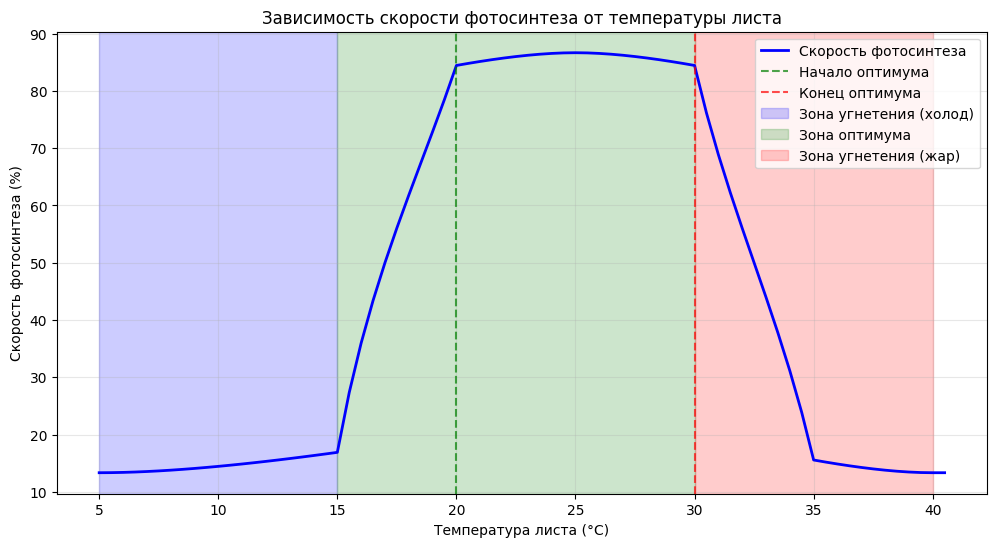

📊 Характеристики зависимости:
  • Минимальная скорость: 13.3% при 5.0°C
  • Максимальная скорость: 86.7% при 25.0°C
  • Оптимальный диапазон: 20-30°C


In [17]:
# Анализ полной зависимости
temp_range = np.arange(5, 41, 0.5)
photo_results = []

print("\n=== АНАЛИЗ ЗАВИСИМОСТИ ФОТОСИНТЕЗА ОТ ТЕМПЕРАТУРЫ ===")

for temp in temp_range:
    photosynthesis_system.input['temperature'] = temp
    photosynthesis_system.compute()
    rate = photosynthesis_system.output['photosynthesis']
    photo_results.append(rate)

# Построение графика зависимости
plt.figure(figsize=(12, 6))
plt.plot(temp_range, photo_results, 'b-', linewidth=2, label='Скорость фотосинтеза')
plt.axvline(x=20, color='g', linestyle='--', alpha=0.7, label='Начало оптимума')
plt.axvline(x=30, color='r', linestyle='--', alpha=0.7, label='Конец оптимума')
plt.xlabel('Температура листа (°C)')
plt.ylabel('Скорость фотосинтеза (%)')
plt.title('Зависимость скорости фотосинтеза от температуры листа')
plt.grid(True, alpha=0.3)
plt.legend()

# Добавление зон
plt.axvspan(5, 15, alpha=0.2, color='blue', label='Зона угнетения (холод)')
plt.axvspan(15, 30, alpha=0.2, color='green', label='Зона оптимума')
plt.axvspan(30, 40, alpha=0.2, color='red', label='Зона угнетения (жар)')
plt.legend()

plt.show()

print("📊 Характеристики зависимости:")
print(f"  • Минимальная скорость: {min(photo_results):.1f}% при {temp_range[np.argmin(photo_results)]}°C")
print(f"  • Максимальная скорость: {max(photo_results):.1f}% при {temp_range[np.argmax(photo_results)]}°C")
print(f"  • Оптимальный диапазон: 20-30°C")

In [18]:
#10. Сравнение с экспериментальными данными


📈 Оценка точности модели:
  • Среднеквадратичная ошибка: 220.92
  • Средняя абсолютная ошибка: 10.44%
  • Максимальная ошибка: 29.44%


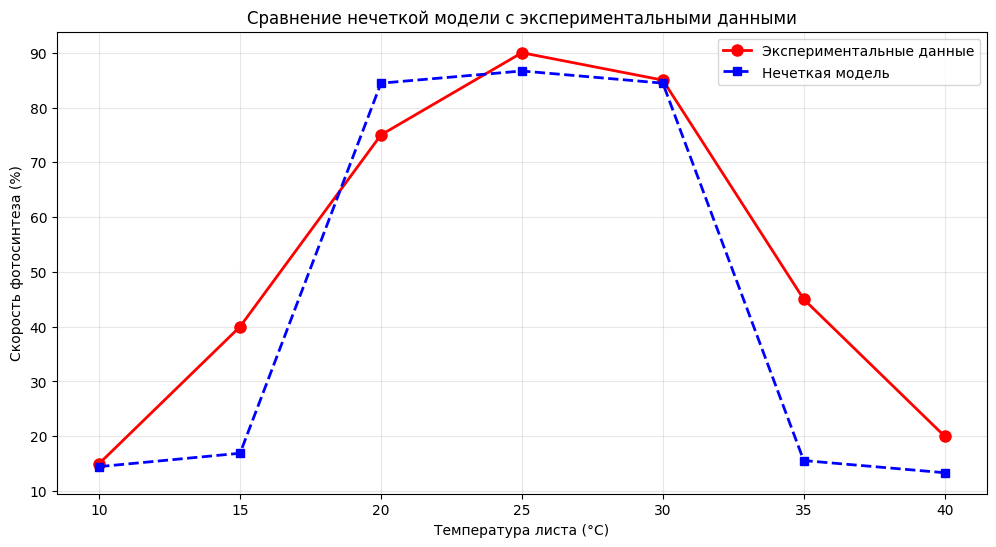

In [19]:
# Известные экспериментальные данные (условные)
experimental_data = {
    'temperatures': [10, 15, 20, 25, 30, 35, 40],
    'rates': [15, 40, 75, 90, 85, 45, 20]  # Условные экспериментальные значения
}

# Расчет по нашей модели
model_rates = []
for temp in experimental_data['temperatures']:
    photosynthesis_system.input['temperature'] = temp
    photosynthesis_system.compute()
    model_rates.append(photosynthesis_system.output['photosynthesis'])

# Сравнительный график
plt.figure(figsize=(12, 6))
plt.plot(experimental_data['temperatures'], experimental_data['rates'], 
         'ro-', linewidth=2, markersize=8, label='Экспериментальные данные')
plt.plot(experimental_data['temperatures'], model_rates, 
         'bs--', linewidth=2, markersize=6, label='Нечеткая модель')
plt.xlabel('Температура листа (°C)')
plt.ylabel('Скорость фотосинтеза (%)')
plt.title('Сравнение нечеткой модели с экспериментальными данными')
plt.grid(True, alpha=0.3)
plt.legend()

# Расчет ошибки
errors = np.array(experimental_data['rates']) - np.array(model_rates)
mse = np.mean(errors**2)
print(f"\n📈 Оценка точности модели:")
print(f"  • Среднеквадратичная ошибка: {mse:.2f}")
print(f"  • Средняя абсолютная ошибка: {np.mean(np.abs(errors)):.2f}%")
print(f"  • Максимальная ошибка: {np.max(np.abs(errors)):.2f}%")

plt.show()